In [40]:
import json
import matplotlib.pyplot as plt
import numpy as np


In [44]:
import json

# Read the file as a string
with open('/content/parsed_detection_results.json', 'r') as file:
    data = file.read()

# Split the content at each closing square bracket and opening square bracket
# This assumes that each block is a valid JSON object wrapped in square brackets

# Fix the data by joining all blocks into one valid JSON array
cleaned_data = "[" + "],[".join(data.strip().split("]\n[")) + "]"

# Try parsing the cleaned data
try:
    detection_data = json.loads(cleaned_data)
    print("Successfully loaded the detection data!")
    print(detection_data[0])  # Check the first entry in the loaded data
except json.JSONDecodeError as e:
    print(f"Error loading JSON: {e}")


Successfully loaded the detection data!
[{'frame_info': '1: 1920x1080', 'objects': [], 'inference_time_ms': 212.49771118164062}]


In [46]:
import matplotlib.pyplot as plt

# Extract frame numbers, inference times, and object counts
frame_numbers = []
inference_times = []
object_counts = []

# Loop through the nested lists and extract the required information
for detection_block in detection_data:
    for entry in detection_block:
        frame_info = entry.get('frame_info', '')
        frame_number = int(frame_info.split(':')[0])  # Extracting frame number
        inference_time = entry.get('inference_time_ms', 0)

        # Count the number of objects in the current frame
        object_count = len(entry.get('objects', []))

        frame_numbers.append(frame_number)
        inference_times.append(inference_time)
        object_counts.append(object_count)

# Check extracted data
print("Frame Numbers:", frame_numbers)
print("Inference Times:", inference_times)
print("Object Counts:", object_counts)


Frame Numbers: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

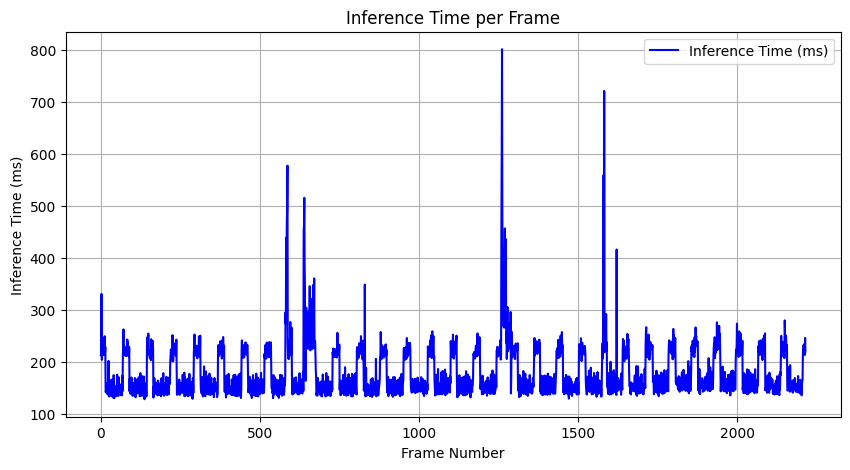

In [47]:
# Plot the inference times over the frames
plt.figure(figsize=(10, 5))
plt.plot(frame_numbers, inference_times, label='Inference Time (ms)', color='blue')
plt.xlabel('Frame Number')
plt.ylabel('Inference Time (ms)')
plt.title('Inference Time per Frame')
plt.legend()
plt.grid(True)
plt.show()


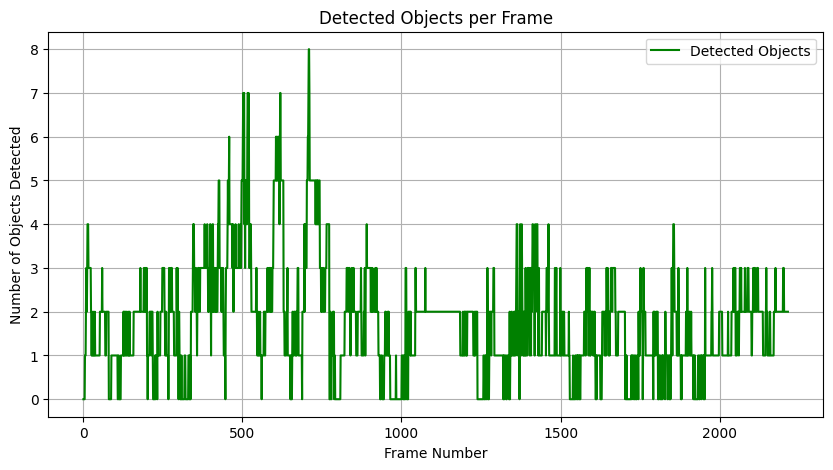

In [48]:
# Plot the number of detected objects across frames
plt.figure(figsize=(10, 5))
plt.plot(frame_numbers, object_counts, label='Detected Objects', color='green')
plt.xlabel('Frame Number')
plt.ylabel('Number of Objects Detected')
plt.title('Detected Objects per Frame')
plt.legend()
plt.grid(True)
plt.show()
